## Santa Clara Winery

Santa Clara Winery es un viñedo fundado en 1881 por la familia Miller, que a través de varias generaciones se ha dedicado a producir algunas de las variedades de Cabernet Sauvignon y Pinot Noir más reconocidas en California. El viñedo cuenta con una base de datos de calidad del vino que contiene información sobre los vinos producidos en el norte de California y sus variables fisicoquímicas, como la acidez, el ácido cítrico, el azúcar residual, los cloruros, entre otras, así como la calidad del vino, medida del 0 al 10. Usted ha sido contratado por el viñedo para generar un modelo predictivo que permita estimar la calidad del vino en base a sus variables fisicoquímicas. Esto le permitirá al viñedo probar nuevos procesos de producción del vino teniendo un estimado a piriori de la calidad del vino en función de sus valores fisicoquímicos.

### Secciones 

1. Generar el conjunto de prueba. El conjunto de prueba se debe generar al comienzo y no volver a consultar hasta después de entonar el mejor modelo. Se debe tomar una muestra estratificada del conjunto de datos.
2. Explorar los datos para obtener ideas. Usted debe ver las tendencias de los datos, distribución de los atributos, escala y rango de valores de cada característica, correlaciones, entre otros.
3. Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático. Manejar los atributos que tienen categorías, hacer feature engineering, crear atributos combinados de ser necesario, manejar los atributos faltantes.
4. Explorar muchos modelos diferentes y preseleccionar los mejores. Debe usar validación cruzada para evaluar los modelos. Debe reportar el resultado de al menos tres modelos distintos y justificar su selección del mejor o de los mejores modelos.
5. Afinar los modelos. Entonar los hiperparámetros usando grid search o random search.
6. Presentar la solución. ¿Cuál es el mejor modelo? ¿Cómo se desempeña? ¿Puede mejorarse el desempeño? ¿Qué sería necesario hacer para mejorarlo?

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Wines"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Extracción del dataset **wines.csv** (1)

In [2]:
import pandas as pd

winesData = pd.read_csv('datasets/wines.csv')

winesData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
winesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
winesData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Creaccion del set de prueba y de entrenamiento (1)

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(winesData, test_size=0.2, random_state=42)

In [6]:

print(len(train_set))
print(len(test_set))

1279
320


In [7]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


## Visualización de la data

In [8]:
winesData = train_set.copy()

In [9]:
corr_matrix = winesData.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

Se observa que el nivel de alcohol, ademas de la acidez volatil, estan altamente relacionados con la calidad del vino

Saving figure attribute_histogram_plots


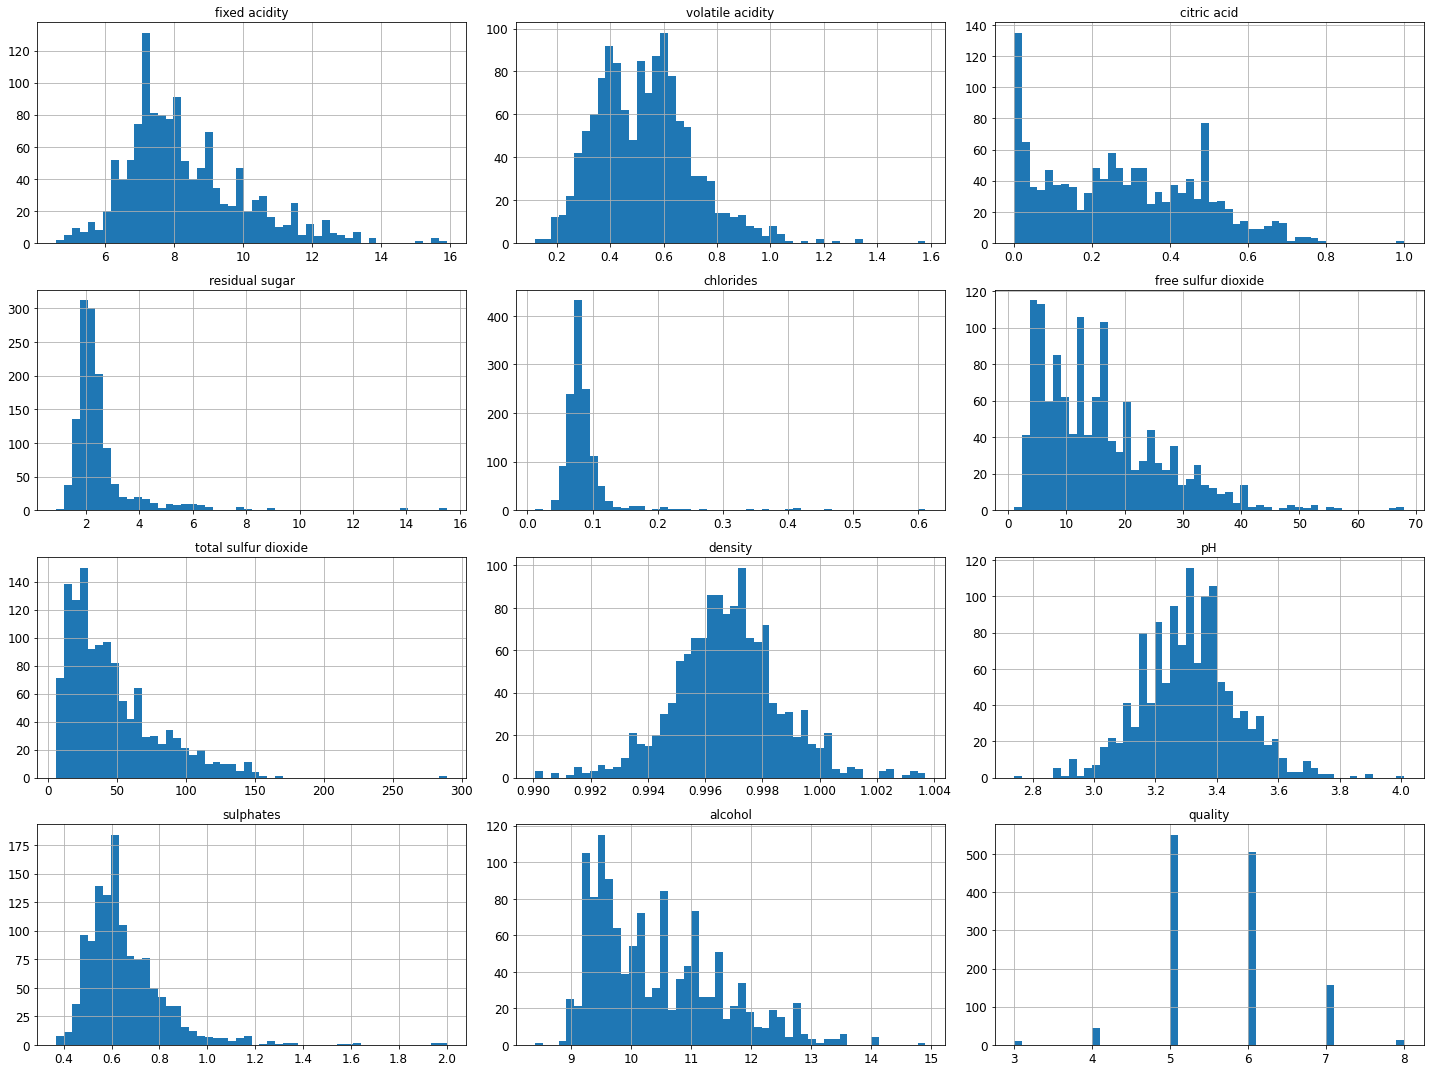

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
winesData.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure scatter_matrix_plot


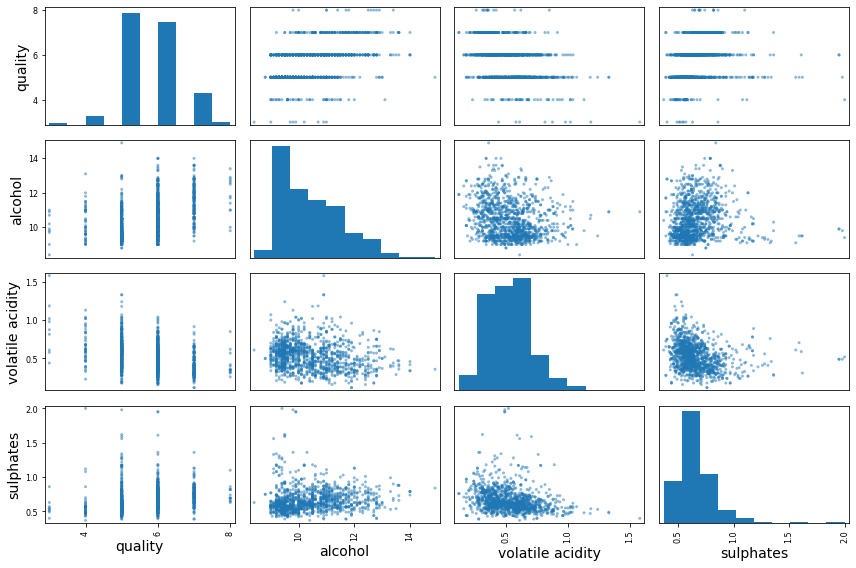

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "volatile acidity",
              "sulphates"]
scatter_matrix(winesData[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

## Preparando y limpiando la data

In [12]:
winesData = train_set.drop("quality", axis=1)
winesData_labels = train_set["quality"].copy()

In [13]:
sample_incomplete_rows = winesData[winesData.isnull().any(axis=1)].head()
sample_incomplete_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


No hay valores nulos en el dataset

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(winesData)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

winesData_prepared = full_pipeline.fit_transform(winesData)

In [15]:
winesData.shape
winesData


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [16]:
winesData_prepared.shape

(1279, 11)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


## Entrenando y evaluando con el conjunto de entrenamiento

### Regresion Lineal

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(winesData_prepared, winesData_labels)

LinearRegression()

In [19]:
some_data = winesData.iloc[:5]  # train_set
some_labels = winesData_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# print(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [5.68864364 6.05664943 5.69269687 5.11164627 4.79907142]


In [20]:
print("Labels:", list(some_labels))

Labels: [6, 6, 6, 5, 5]


In [21]:
some_data_prepared

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828]])

In [22]:
from sklearn.metrics import mean_squared_error

winesData_predictions = lin_reg.predict(winesData_prepared)

print(winesData_predictions)

[5.68864364 6.05664943 5.69269687 ... 4.9703554  6.61115563 6.69768634]


In [23]:
lin_mse = mean_squared_error(winesData_labels, winesData_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6512995910592837

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

lin_mae = mean_absolute_error(winesData_labels, winesData_predictions)
lin_mae

lin_scores = cross_val_score(lin_reg, winesData_prepared, winesData_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.62576397 0.71661737 0.69198217 0.70092111 0.67935552 0.67375579
 0.66745333 0.67890987 0.49594792 0.64828114]
Mean: 0.6578988186927085
Standard deviation: 0.05921004161564627


#### RMSE con Regresion Lineal es **0.6512995910592837**

### DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(winesData_prepared, winesData_labels)

DecisionTreeRegressor(random_state=42)

In [26]:
winesData_predictions = tree_reg.predict(winesData_prepared)
tree_mse = mean_squared_error(winesData_labels, winesData_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [27]:
scores = cross_val_score(tree_reg, winesData_prepared, winesData_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [0.77055175 0.80039053 0.8291562  0.63737744 0.82443162 0.8660254
 0.73950997 0.80039053 0.64347688 0.86488814]
Mean: 0.7776198470173558
Standard deviation: 0.07776903709705676


#### RMSE con DecisionTreeRegressor es **0.0**

### RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(winesData_prepared, winesData_labels)

RandomForestRegressor(random_state=42)

In [29]:
winesData_predictions = forest_reg.predict(winesData_prepared)
forest_mse = mean_squared_error(winesData_labels, winesData_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.21834135571468008

In [30]:
scores = cross_val_score(lin_reg, winesData_prepared, winesData_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.657899
std       0.062413
min       0.495948
25%       0.653074
50%       0.676333
75%       0.688826
max       0.716617
dtype: float64

#### RMSE con RandomForestRegressor es **0.21834135571468008**

### SVM

In [31]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(winesData_prepared, winesData_labels)
winesData_predictions = svm_reg.predict(winesData_prepared)
svm_mse = mean_squared_error(winesData_labels, winesData_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6566986702591818

#### RMSE con SVM es **0.6566986702591818**

## Random Search con SVM

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

svm_reg = SVR(kernel="linear")

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
param_distribs = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rnd_search = RandomizedSearchCV(svm_reg, param_distributions = param_distribs, n_iter = 10, n_jobs = 4, cv = 5, random_state = 42, scoring = 'neg_mean_squared_error') 
rnd_search.fit(winesData_prepared, winesData_labels) 
# rnd_search.cv_results_

RandomizedSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b1b1437f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b1d4f4790>},
                   random_state=42, scoring='neg_mean_squared_error')

In [33]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6654696809715092 {'C': 5.745401188473625, 'gamma': 1.0507143064099163}
0.6655770996797326 {'C': 9.31993941811405, 'gamma': 0.6986584841970366}
0.6654961307763486 {'C': 3.560186404424365, 'gamma': 0.2559945203362026}
0.6655210007227012 {'C': 2.580836121681995, 'gamma': 0.9661761457749352}
0.6655835192364815 {'C': 8.011150117432088, 'gamma': 0.8080725777960455}
0.6655010293257414 {'C': 2.2058449429580245, 'gamma': 1.0699098521619943}
0.6655711892592294 {'C': 10.324426408004218, 'gamma': 0.31233911067827613}
0.6654618862983493 {'C': 3.818249672071006, 'gamma': 0.2834045098534338}
0.6655677160646769 {'C': 5.042422429595377, 'gamma': 0.6247564316322378}
0.6655137258945306 {'C': 6.319450186421157, 'gamma': 0.3912291401980419}


## Evaluación del sistema con el conjunto de prueba usando SVM

In [34]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.6298222310261667

In [35]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.57824851, 0.67748118])

### El RMSE final es de **0.6298222310261667**

## Random Search con RandomForestRegressor

In [36]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
              
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(winesData_prepared, winesData_labels) 
# rnd_search.cv_results_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b1b143220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b1b1435b0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [37]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6039573817235472 {'max_features': 7, 'n_estimators': 180}
0.6142955984247395 {'max_features': 5, 'n_estimators': 15}
0.6047889500916305 {'max_features': 3, 'n_estimators': 72}
0.610962194392375 {'max_features': 5, 'n_estimators': 21}
0.6033159164925377 {'max_features': 7, 'n_estimators': 122}
0.6048151399277624 {'max_features': 3, 'n_estimators': 75}
0.6045793691583676 {'max_features': 3, 'n_estimators': 88}
0.6037924436020878 {'max_features': 5, 'n_estimators': 100}
0.6035936605477039 {'max_features': 3, 'n_estimators': 150}
0.7265782137769438 {'max_features': 5, 'n_estimators': 2}


## Evaluación del sistema con el conjunto de prueba usando RandomForestRegressor

In [38]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5463698501027641

In [39]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.49074965, 0.59682896])

### El RMSE final es de **0.5463698501027641**